# Visualisasi dan Interpretasi Hasil Clustering

## Import Library

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from sklearn.preprocessing import MinMaxScaler

## Load Data Hasil Clustering dan Data Yang sudah di encoding

##### Menggunakan data yang sudah di label encode agar memudahkan untuk visualisasi

In [47]:
df = pd.read_csv("DataCleanLabel.csv")
df_cluster = pd.read_csv("DataClustering.csv")
display(df)
display(df_cluster) 
df["Cluster"] = df_cluster["Cluster"]

Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2059       0  20.976842  1.710730  131.408528                               1   
2060       0  21.982942  1.748584  133.742943                               1   
2061       0  22.524036  1.752206  133.689352                               1   
2062       0  24.361936  1.739450  133.346641                               1   
2063       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     2      0  2.000000    0  0.000000  1.000000     3   
1        0   3.0  3.0     2      1  3.000000    1  3.000000  0.000000     2   
2        0   2.0  3.0     2      0  2.000000    0  2.000000  1.000000     1   
3        0   3.0  3.0     2      0  2.000000    0  2.000000  0.000000     1   
4        0   2.0  1.0     2      0  2.000000    0  0.000000  0.000000     2   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2059     1   3.0  3.0     2      0  1.728139    0  1.676269  0.906247     2   
2060     1   3.0  3.0     2      0  2.005130    0  1.341390  0.599270     2   
2061     1   3.0  3.0     2      0  2.054193    0  1.414209  0.646288     2   
2062     1   3.0  3.0     2      0  2.852339    0  1.139107  0.586035     2   
2063     1   3.0  3.0     2      0  2.863513    0  1.026452  0.714137     2   

      MTRANS           NObeyesdad  
0          3        Normal_Weight  
1          3        Normal_Weight  
2          3        Normal_Weight  
3          4   Overweight_Level_I  
4          3  Overweight_Level_II  
...      ...                  ...  
2059       3     Obesity_Type_III  
2060       3     Obesity_Type_III  
2061       3     Obesity_Type_III  
2062       3     Obesity_Type_III  
2063       3     Obesity_Type_III  

[2064 rows x 17 columns]

Unnamed: 0  FAVC_yes  CAEC_Sometimes  CAEC_no  CAEC_Frequently  \
0              0         0               1        0                0   
1              1         0               1        0                0   
2              2         0               1        0                0   
3              3         0               1        0                0   
4              4         0               1        0                0   
...          ...       ...             ...      ...              ...   
2059        2059         1               1        0                0   
2060        2060         1               1        0                0   
2061        2061         1               1        0                0   
2062        2062         1               1        0                0   
2063        2063         1               1        0                0   

           FAF  FCVC  NCP  SMOKE_yes  SCC_yes  Cluster  
0     0.000000   2.0  3.0          0        0        2  
1     3.000000   3.0  3.0          1        1        2  
2     2.000000   2.0  3.0          0        0        2  
3     2.000000   3.0  3.0          0        0        2  
4     0.000000   2.0  1.0          0        0        2  
...        ...   ...  ...        ...      ...      ...  
2059  1.676269   3.0  3.0          0        0        2  
2060  1.341390   3.0  3.0          0        0        2  
2061  1.414209   3.0  3.0          0        0        2  
2062  1.139107   3.0  3.0          0        0        2  
2063  1.026452   3.0  3.0          0        0        2  

[2064 rows x 11 columns]

## Visualisasi

### Visualisasi Distribusi Tingkat Obesitas

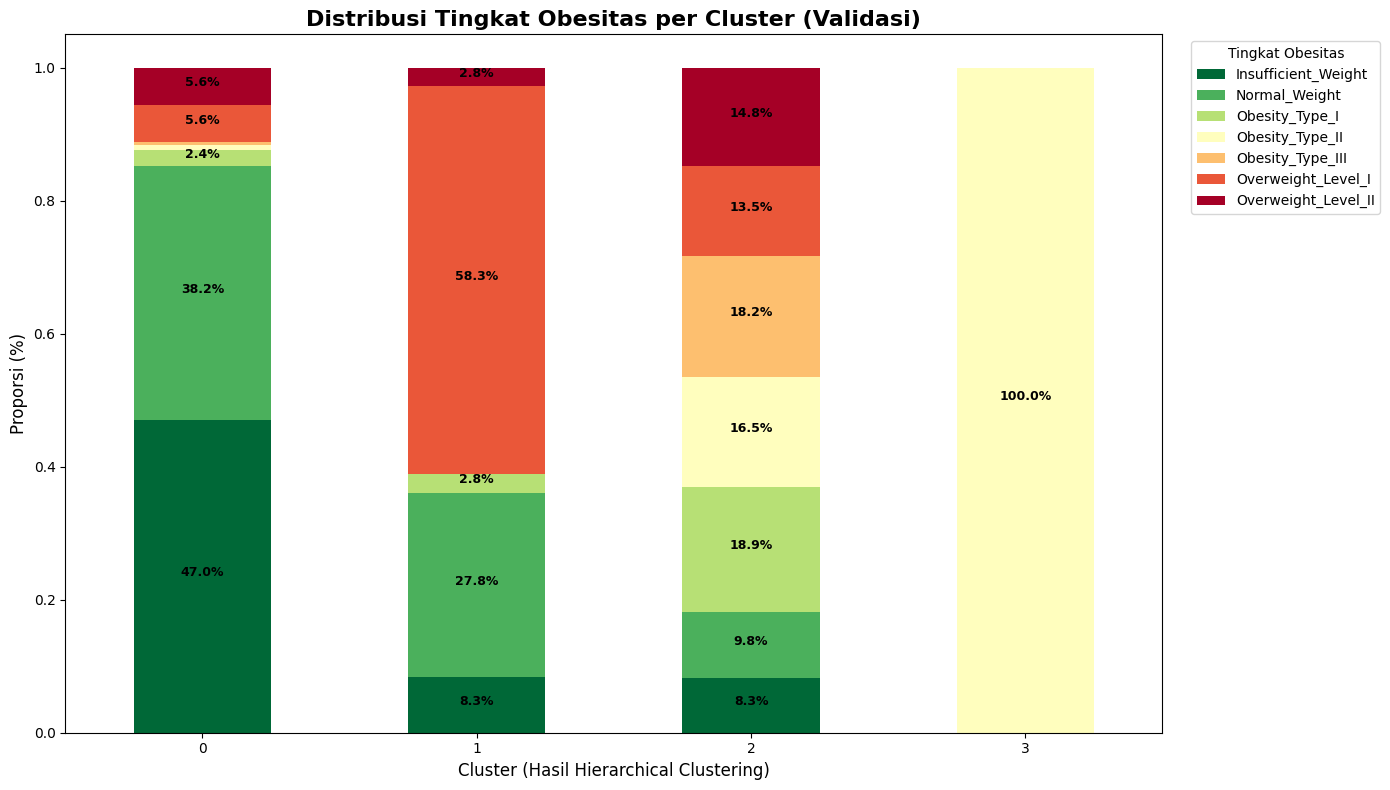

In [48]:
cross_tab = pd.crosstab(df['Cluster'], df['NObeyesdad'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='RdYlGn_r')

plt.title('Distribusi Tingkat Obesitas per Cluster (Validasi)', fontsize=16, fontweight='bold')
plt.xlabel('Cluster (Hasil Hierarchical Clustering)', fontsize=12)
plt.ylabel('Proporsi (%)', fontsize=12)
plt.legend(title='Tingkat Obesitas', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)

# 3. Menambahkan Label Persentase di tengah batang
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab.loc[x], cross_tab.loc[x].cumsum()):
        # Hanya tampilkan angka jika proporsinya cukup besar (> 2%) biar gak numpuk
        if proportion > 0.02: 
            plt.text(x=n,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=9,
                     fontweight="bold", 
                     ha="center")

plt.tight_layout()
plt.show()

### Visualisasi semua fitur

<Figure size 1000x800 with 0 Axes>

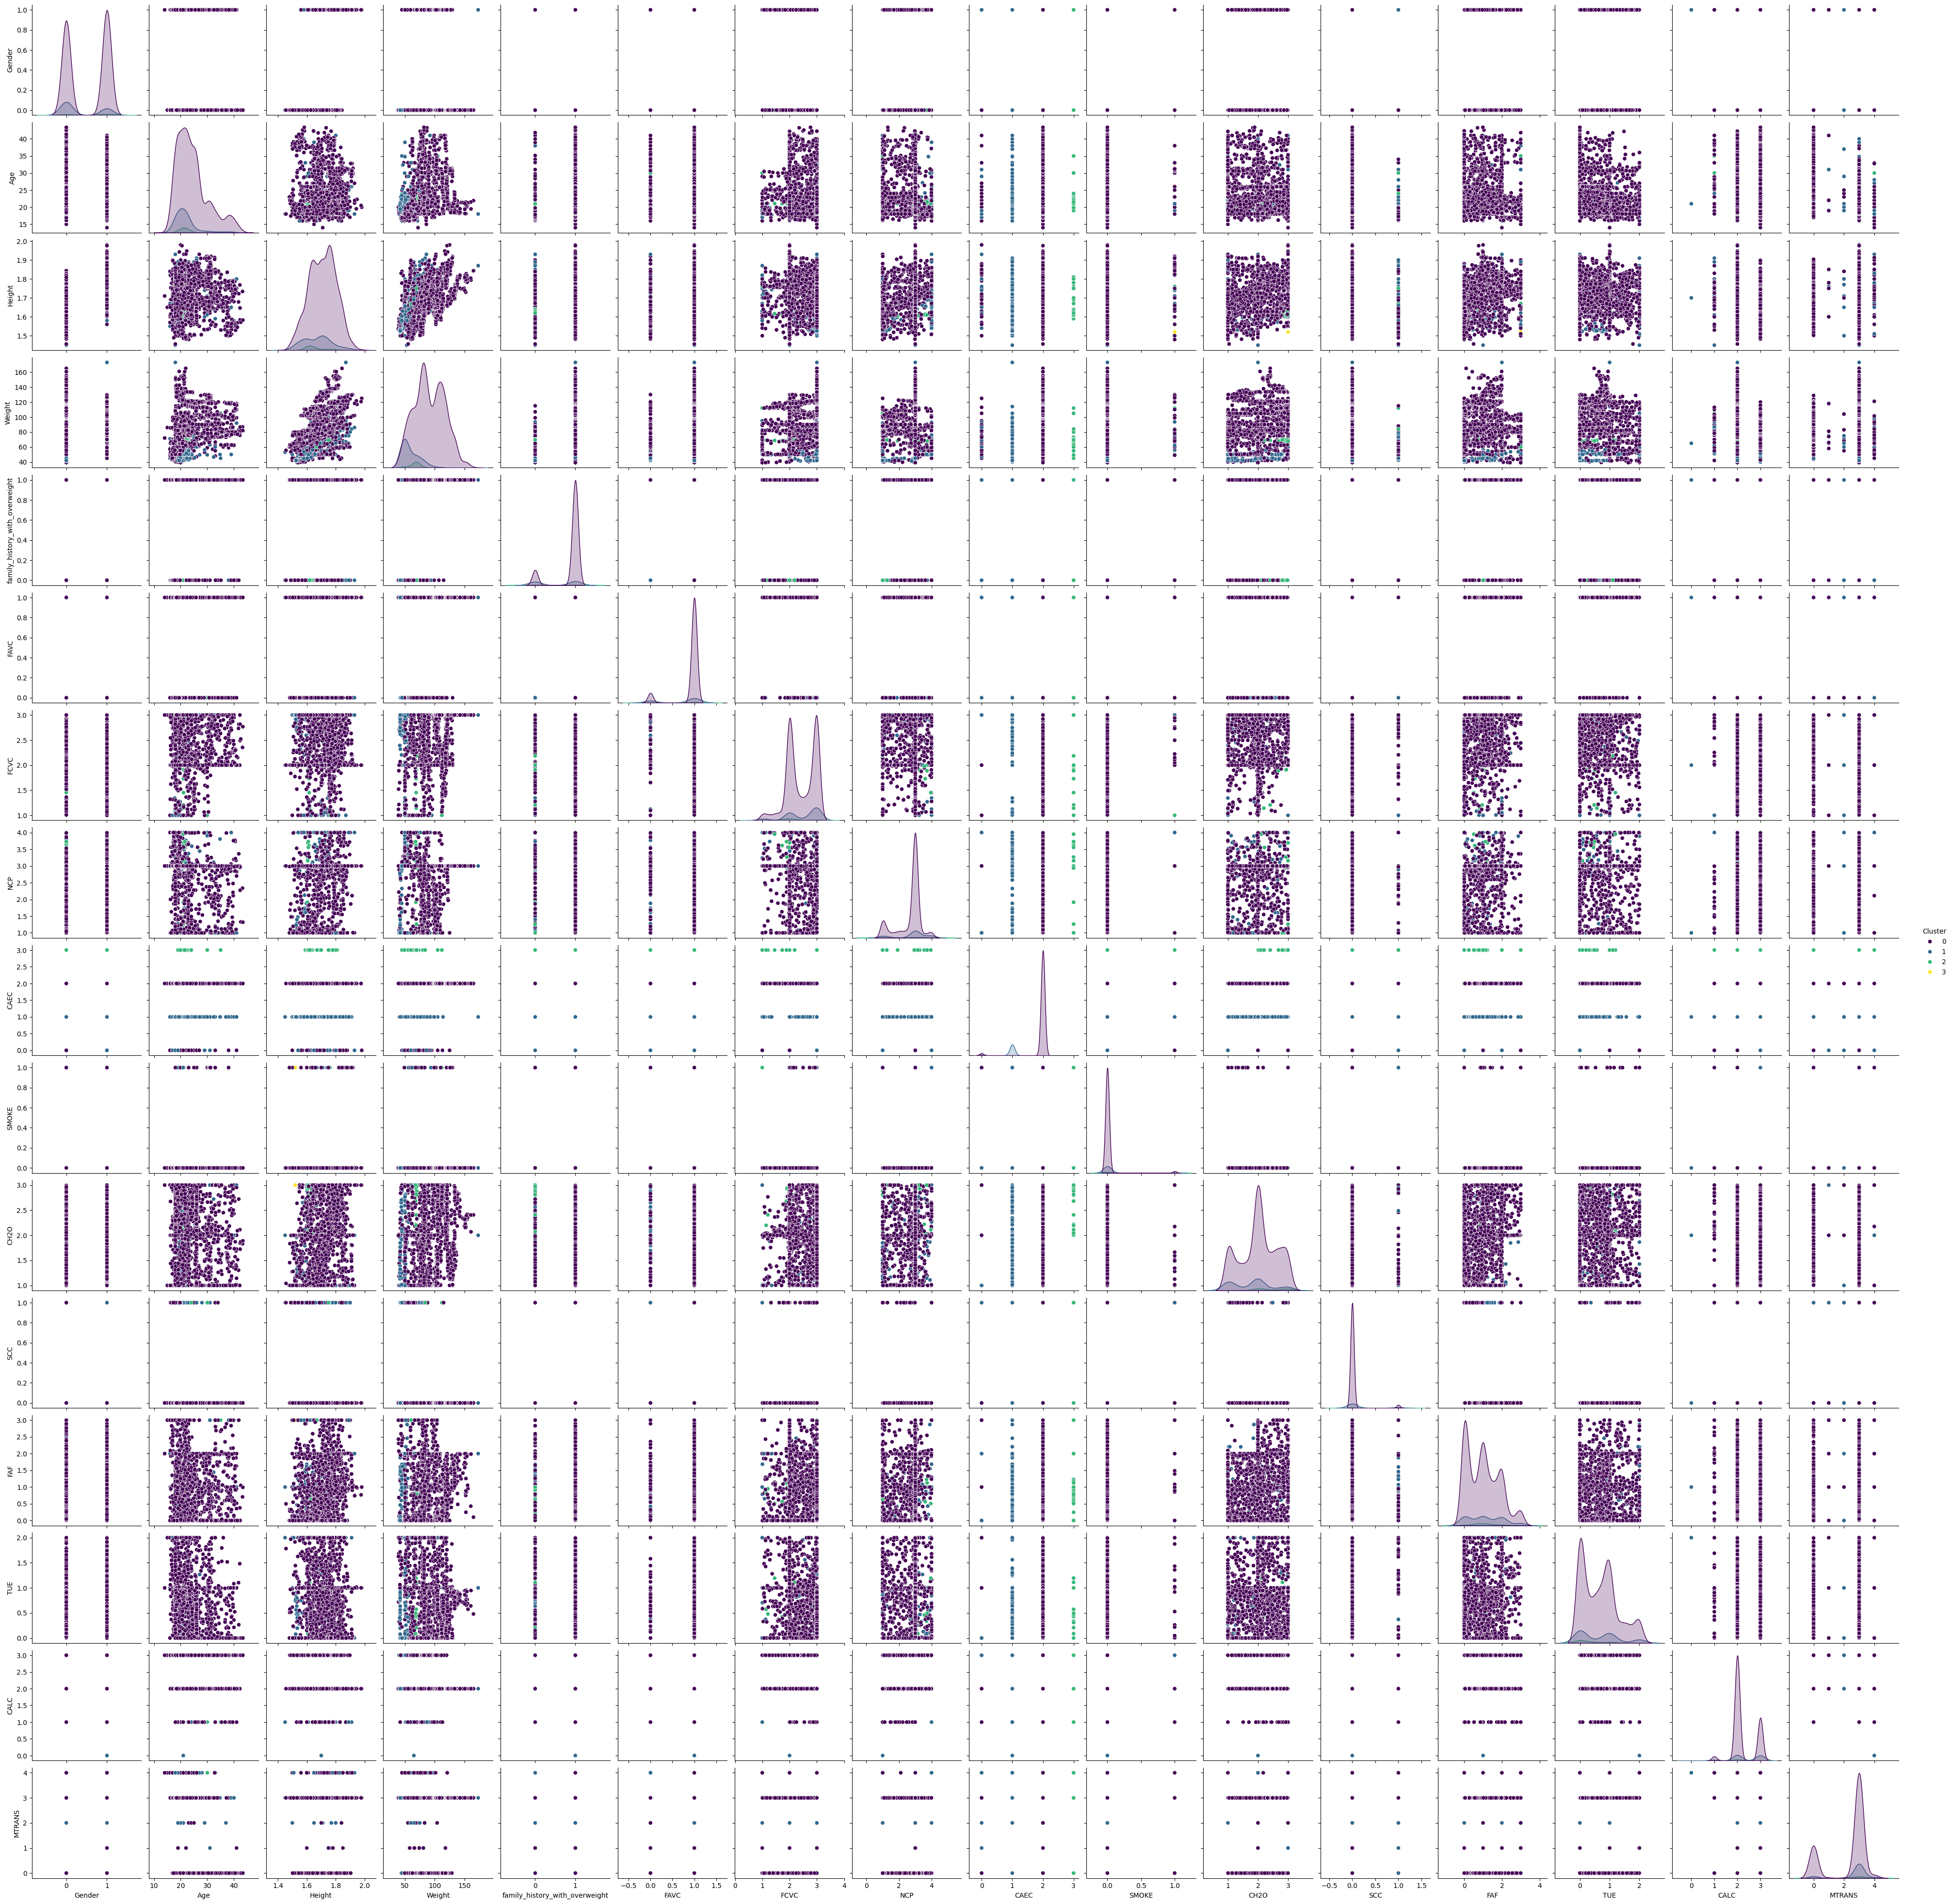

In [34]:
plt.figure(figsize=(10,8))
sns.pairplot(df, hue="Cluster", palette="viridis")
plt.show()

### Visualisasi Radar Chart

/var/folders/wm/v47lypj90l1gqzsfzt6rzn2c0000gn/T/ipykernel_25137/818624735.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(cluster_mean.index))


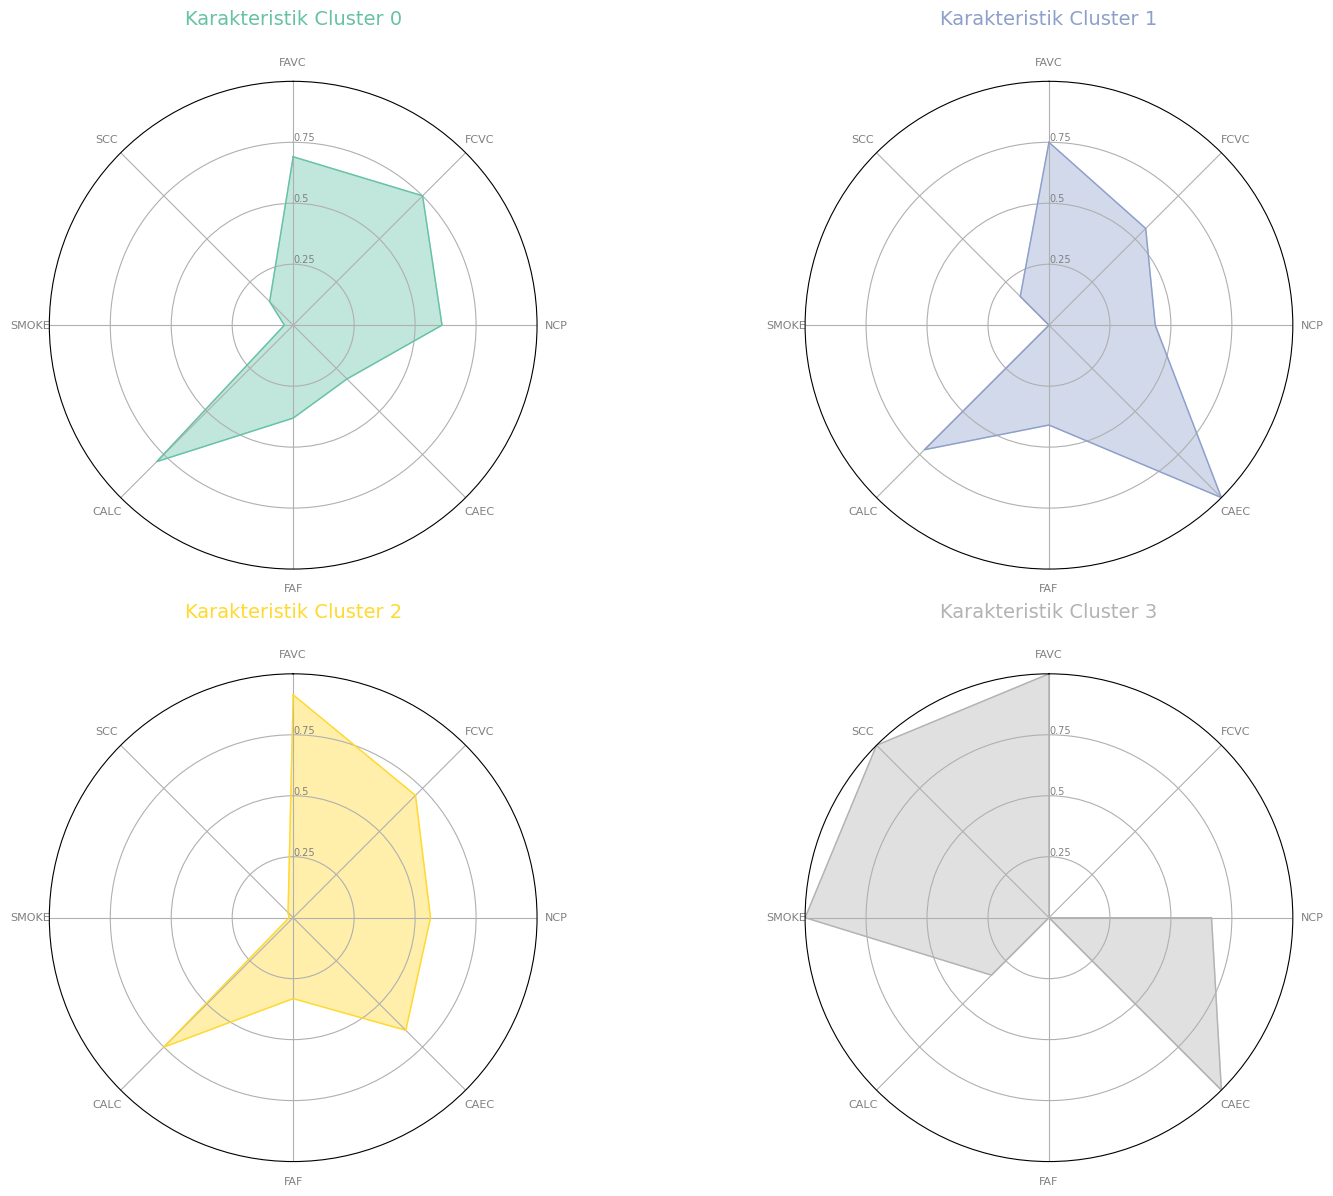

In [49]:
features_radar = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'FAF', 'CALC', "SMOKE", "SCC"]

# 2. Normalisasi Data dulu (PENTING!)
# Agar skala 'Makan Sayur' (1-3) bisa dibandingkan dengan 'Olahraga' (0-3) dalam satu grafik
scaler = MinMaxScaler()
df_radar_scaled = df.copy()
df_radar_scaled[features_radar] = scaler.fit_transform(df[features_radar])

# 3. Hitung Rata-rata per 4 Cluster
cluster_mean = df_radar_scaled.groupby('Cluster')[features_radar].mean().reset_index()
# 4. Fungsi Radar Chart (Updated Layout)
def make_spider(row, title, color):
    categories = list(cluster_mean.columns[1:])
    N = len(categories)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # -- PERUBAHAN DISINI (Layout 2x2) --
    ax = plt.subplot(2, 2, row+1, polar=True) 
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0, 1)
    
    values = cluster_mean.loc[row].drop('Cluster').values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.title(title, size=14, color=color, y=1.1)

# 5. Eksekusi Plot (4 Cluster)
plt.figure(figsize=(16, 12)) # Ukuran diperbesar biar muat 4
my_palette = plt.cm.get_cmap("Set2", len(cluster_mean.index))

for i in range(len(cluster_mean.index)):
    make_spider(row=i, title=f'Karakteristik Cluster {i}', color=my_palette(i))

plt.tight_layout()
plt.show()

## Interpretasi Hasil Clustering

##  Cluster 0 : Pola Seimbang, Risiko Rendah”
Cluster 0 menunjukkan pola makan cukup stabil dengan konsumsi sayur tinggi, ngemil dan alkohol moderat, serta kebiasaan hidup yang tidak terlalu ekstrem. Hal ini selaras dengan distribusi berat badan yang didominasi Normal Weight (47%), menjadikan kelompok ini sebagai cluster berisiko rendah terhadap obesitas. Secara keseluruhan, perilaku mereka masih dalam batas sehat dan tidak menunjukkan pola yang memicu akumulasi berat badan berlebih.

##  Cluster 1 : Kelompok Kebanyakan Nyemil, Resiko Lumayan tinggi
Cluster 1 memiliki nilai CAEC (ngemil) yang sangat tinggi, sementara faktor penyeimbang seperti aktivitas fisik tidak menonjol, sehingga menghasilkan dominasi Overweight Level I sebesar 58.3%. Pola ngemil berlebihan yang tidak dibarengi aktivitas fisik cukup menjadi faktor utama naiknya berat badan pada cluster ini. Kelompok ini merupakan fase awal risiko obesitas dan sangat cocok menjadi target intervensi preventif terkait pola makan.

##  Cluster 2 : Konsumsi Kalori tinggi, Resiko Sedang
Cluster 2 memiliki dominasi pada Overweight Level I (56.8%), mengindikasikan bahwa kelompok ini berada pada tahap awal peningkatan berat badan. Individu dalam cluster ini belum masuk kategori obesitas berat, tetapi sudah menunjukkan pola risiko seperti kebiasaan ngemil yang tinggi. Kelompok ini tepat untuk intervensi dini agar tidak berkembang menjadi obesitas.

##  Cluster 3 : Kelompok Paling Tidak Sehat, Resiko Sangat Tinggi
Cluster 3 adalah kelompok dengan risiko obesitas paling jelas, karena 100% anggotanya berada pada kategori Obesity Type II. Radar chart memperlihatkan pola ekstrem seperti tingkat merokok sangat tinggi (SMOKE), ditambah aktivitas fisik yang justru rendah. Kombinasi ini mencerminkan kelompok dengan perilaku tidak stabil: ada upaya kontrol kalori, namun tertutup oleh faktor risiko lain seperti merokok dan pola makan yang tidak seimbang. Cluster ini merupakan prioritas utama untuk intervensi kesehatan terkait obesitas.